<a href="https://colab.research.google.com/github/DennisSoemers/MultiArmedBanditsTutorial/blob/main/Multi_Armed_Bandits_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Armed Bandits Tutorial
If you opened this notebook in Google Colab, I recommend to start by saving a copy of the notebook in your own Google Drive, such that you can save any of your changes and experiments.

## Importing Modules
We will start by importing some modules that will be useful throughout much of the subsequent code in this tutorial.

In [19]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from math import sqrt
from scipy.stats import norm
from typing import List

# Make plots look nice
sns.set()
sns.set_context("notebook")
sns.set_style("whitegrid")

## Creating the Stochastic MAB Problem

In the real world, we normally don't have direct access to the distributions over rewards that are associated with our actions (arms). Normally, these distributions implicitly exist somewhere, and our reward observations only emerge as we interact with some processes (e.g., users, complex simulations, etc.).

For simplicity, here we just create a bunch of explicit distributions that we can sample from. This gives us a very simple simulation, and lets us focus purely on the implementation of the action-selection algorithms.

In [16]:
np.random.seed(2077)    # fix seed to make this reproducible
k = 25      # number of arms

# In this section, we'll generate Normal distributions for all of our arms,
# because that's simple and easy. Note that in principle, it is not necessarily
# the case that every arm has a normal distribution (or the same type of
# distribution).
#
# Every normal distribution is defined by a mean and a standard deviation.
# We'll sample random values for our means and standard deviations, such that
# even we ourselves don't know which arms are best (at least, not without
# cheating and looking at the means that were generated).

# List with one tuple for every arm. First number of every tuple is mean,
# second is standard deviation
reward_distributions = [(np.random.random() - 0.5, 0.5 * np.random.random()) for _ in range(k)]

## Random MAB Algorithm

As a start, we'll implement a very simple and silly Random MAB algorithm, which always selects arms uniformly at random. It is not intelligent at all, but it is very easy example, and a useful sanity check: if any of our algorithms every do worse than this, something is probably wrong!

In [4]:
class RandomAlg:
  """
  Random MAB algorithm, which selects actions uniformly at random.
  """

  def __init__(self):
    """
    This is where we could initialise any variables we wanted to,
    but for the random algorithm this is not necessary, so we do
    nothing.
    """
    pass

  def choose_arm(self) -> int:
    """
    :return: Arm, in [0, k), selected uniformly at random.
    """
    return np.random.randint(low=0, high=k)

  def observe_reward(self, arm: int, reward: float) -> None:
    """
    This function lets us observe rewards from arms we have selected.
    The simple random algorithm doesn't care and does nothing.

    :param arm: Index (starting at 0) of the arm we played.
    :param reward: The reward we received.
    """
    pass


## Simulation Function

Next, we'll define a function that runs a simulation for a single MAB algorithm. A simulation means: running a sequence of time steps, where we ask the algorithm to pick an arm in every time step, and we sample a reward from the distribution of the arm that was picked. **You should not have to change this!**

In [5]:
def run_simulation(algorithm, n: int = 20000) -> List[float]:
  """
  Runs a simulation for a single algorithm and a given number of time steps.

  :param algorithm: Algorithm to use to select arms.
  :param n: Number of time steps we'll simulate.
  :return: List of rewards we have obtained.
  """
  rewards = list()

  for t in range(n):
    arm = algorithm.choose_arm()

    # NOTE: it's unrealistic that we're explicitly getting mean and std of a
    # reward distribution here! In the real world, this distribution would
    # emerge from some natural process or complex simulation that we can
    # only interact with through sampling!
    mean, std = reward_distributions[arm]
    reward = norm.rvs(loc=mean, scale=std, size=1)

    rewards.append(reward)

  return rewards

## First Experiment: Evaluating the Random Algorithm
As a first experiment, we will evaluate the performance (in terms of rewards and cumulative regret) of the Random algorithm.

Total rewards = -484.2445528249263


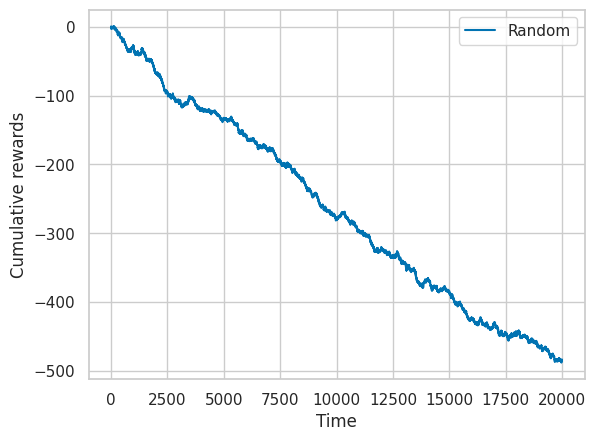

In [18]:
# First we have to run the simulation with the Random algorithm
rewards = run_simulation(RandomAlg())
rewards = np.asarray(rewards)   # numpy array nicer to work with than list

# We can print the sum of rewards obtained
print(f"Total rewards = {np.sum(rewards)}")

# Create a plot of the rewards we collect over time
palette = itertools.cycle(sns.color_palette('colorblind'))
fig, ax = plt.subplots()
plt.plot([t for t in range(len(rewards))], np.cumsum(rewards), label="Random", color=next(palette))
ax.set_xlabel("Time")
ax.set_ylabel("Cumulative rewards")
ax.legend()

## Implementing More Algorithms

Here, we'll finally start implementing some more advanced algorithms. This is where you'll have to add your own implementations. Every time after you have implemented one algorithm, you can skip to the [Evaluating Stochastic MAB Algorithms](#evaluating-stochastic-mab-algorithms) section down below and add your new algorithm to the list of algorithms that we evaluate.

In [1]:
class ExploreThenCommit:
  """
  The explore-then-commit (ETC) algorithm. It should first try every
  arm m times (for some m >= 1), and afterwards always greedly pull
  whichever arm performed best on average during the initial
  exploration phase.
  """

  def __init__(self, m: int):
    """
    :param m: Number of times we want to explore every arm.
    """
    self.m = m

  def choose_arm(self) -> int:
    """
    :return: Arm, in [0, k).
    """
    # TODO: provide implementation

  def observe_reward(self, arm: int, reward: float) -> None:
    """
    This function lets us observe rewards from arms we have selected.

    :param arm: Index (starting at 0) of the arm we played.
    :param reward: The reward we received.
    """
    # TODO: provide implementation

In [ ]:
class UCB1:
  """
  The UCB1 algorithm.
  """

  def __init__(self, C: float):
    """
    :param C: The exploration parameter C.
    """
    self.C = C
    # TODO create variables to memorise visit counts and average (or total) rewards

  def choose_arm(self) -> int:
    """
    :return: Arm, in [0, k).
    """
    # TODO: provide implementation

  def observe_reward(self, arm: int, reward: float) -> None:
    """
    This function lets us observe rewards from arms we have selected.

    :param arm: Index (starting at 0) of the arm we played.
    :param reward: The reward we received.
    """
    # TODO: provide implementation

<a name="evaluating-stochastic-mab-algorithms"></a>
## Evaluating Stochastic MAB Algorithms

This time we'll not just evaluate the Random algorithm, but also evaluate any new algorithms we've implemented.

In [20]:
# List of all the algorithms we want to evaluate
algorithms = [
    RandomAlg(),

    # Uncomment once you've implemented this algorithm:
    ExploreThenCommit(m=20),

    # Uncomment once you've implemented this algorithm:
    UCB1(C=sqrt(2.0)),
]

# Prepare fig
palette = itertools.cycle(sns.color_palette('colorblind'))
fig, ax = plt.subplots()

# For every algorithm, run simulation and add plot
for algorithm in algorithms:
  rewards = run_simulation(algorithm)
  rewards = np.asarray(rewards)
  plt.plot([t for t in range(len(rewards))], np.cumsum(rewards), label=algorithm.__class__.__name__, color=next(palette))

# Finish fig
ax.set_xlabel("Time")
ax.set_ylabel("Cumulative rewards")
ax.legend()

NameError: ignored